# Deep Fashion: In Shop Clothes Retrieval

Details:
http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html

Dataset download:
https://drive.google.com/drive/folders/0B7EVK8r0v71pQ2FuZ0k0QnhBQnc

In this notebook, we will crop the images according to their given bbox in the dataset DeepFashion. Then we will saved them in a cropped_image folder. The purpose of this cropping is to train a cloth classifier which can detect type of clothes in a given image. Cropping training image will decrease noise in the training set which will help us to achieve a better result.

In [1]:
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt

In [2]:
ROOT_DIR = '/Users/sparrow/Learning/machine-learning/wicked-wench/deep-fashion/in-shop-clothes-retrieval'
DATA_DIR = '/srv/downloads/moshfiqur-ml-datasets/deep-fashion/in-shop-clothes-retrieval'

### Read the image annotations and have a look into them

In [3]:
df_bbox = pd.read_csv(os.path.join(DATA_DIR, 'annotations', 'list_bbox_inshop.txt'), delimiter='\t')

In [4]:
df_bbox.head()

,image_name,clothes_type,pose_type,x_1,y_1,x_2,y_2
0,img/WOMEN/Blouses_Shirts/id_00000001/02_1_fron...,1,1,50,49,208,235
1,img/WOMEN/Blouses_Shirts/id_00000001/02_2_side...,1,2,119,48,136,234
2,img/WOMEN/Blouses_Shirts/id_00000001/02_3_back...,1,3,50,42,213,240
3,img/WOMEN/Blouses_Shirts/id_00000001/02_4_full...,1,4,82,30,162,129
4,img/WOMEN/Dresses/id_00000002/02_1_front.jpg,3,1,65,45,233,252


### Lets have a look at a sample image

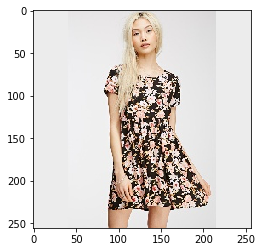

In [5]:
test_image = cv2.imread(os.path.join(DATA_DIR, 'img/WOMEN/Dresses/id_00000002/02_1_front.jpg'))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

### Crop an image with associated bbox

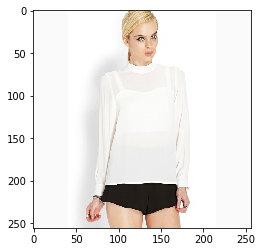

(186, 158, 3)


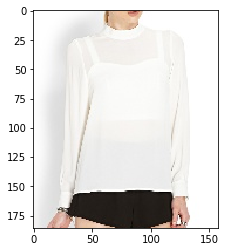

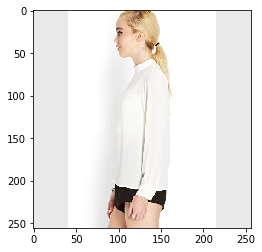

(186, 17, 3)


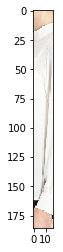

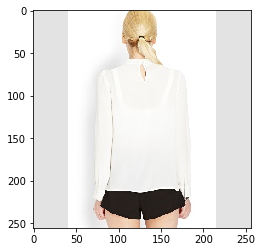

(198, 163, 3)


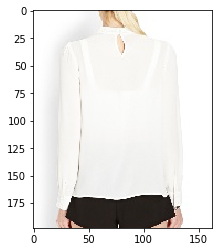

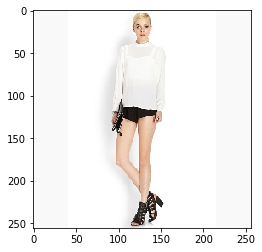

(99, 80, 3)


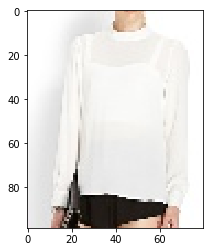

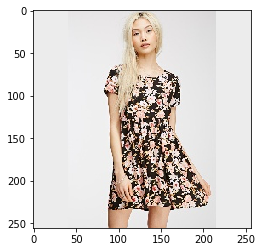

(207, 168, 3)


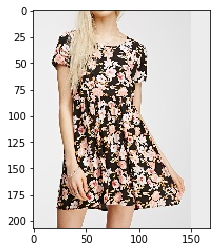

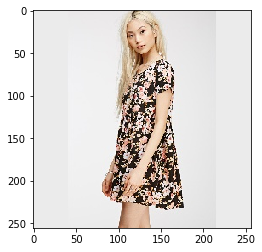

(206, 56, 3)


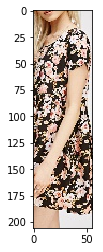

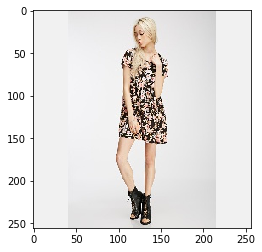

(133, 80, 3)


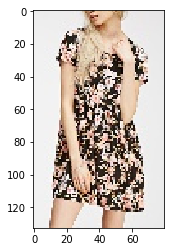

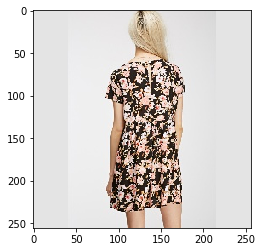

(211, 121, 3)


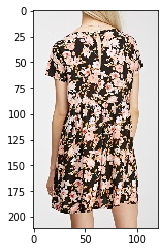

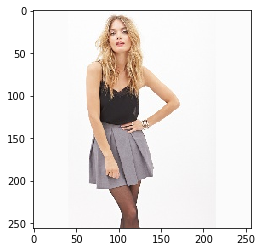

(88, 109, 3)


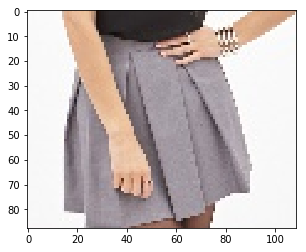

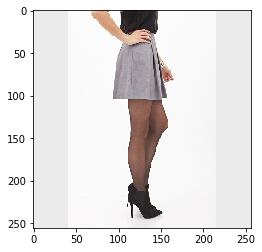

(99, 10, 3)


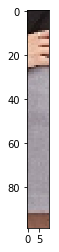

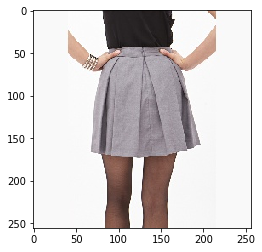

(150, 186, 3)


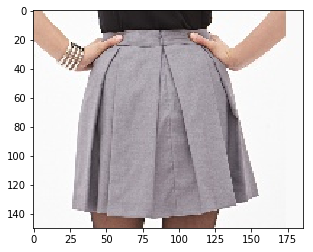

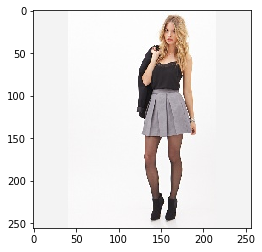

(64, 85, 3)


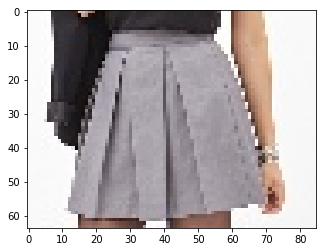

In [6]:
for index, row in df_bbox.iterrows():
    test_image = cv2.imread(os.path.join(DATA_DIR, row['image_name']))
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image)
    plt.show()
    
    y_min = row['y_1']
    x_min = row['x_1']
    y_max = row['y_2']
    x_max = row['x_2']

    cropped_image = test_image[y_min:y_max, x_min:x_max]
    print(cropped_image.shape)
    
    plt.imshow(cropped_image)
    plt.show()
    
    if index > 10:
        break

### Crop bulk images into their cloth type directories

In [7]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

In [8]:
image_written_count = 0

for index, row in df_bbox.iterrows():
    _, gender, cloth_type, id_, image_name = row['image_name'].split('/')
    
    # The side image bbox are very thin and not perfect
    # So we are skipping them for now
    if 'side' in image_name:
        continue
    
    test_image = cv2.imread(os.path.join(DATA_DIR, row['image_name']))
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
    x_min = row['x_1']
    y_min = row['y_1']
    x_max = row['x_2']
    y_max = row['y_2']

    cropped_image = test_image[y_min:y_max, x_min:x_max]
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    
    output_dir = os.path.join(DATA_DIR, 'cropped_img', gender, cloth_type)
    
    if not os.path.isdir(output_dir):
        mkdir_p(output_dir)
    
    cv2.imwrite(os.path.join(output_dir, cloth_type+'_'+id_+'_'+image_name), cropped_image)
    
    # if index > 10:
    #     break
    
    image_written_count += 1
    
    if image_written_count % 10 == 0:
        print(image_written_count, 'images has been cropped')
    
    

### Saliency detection with StaticSaliencySpectralResidual (Just for trying out new things)

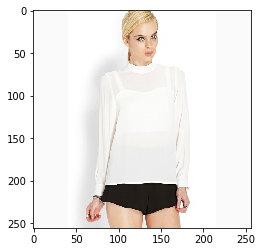

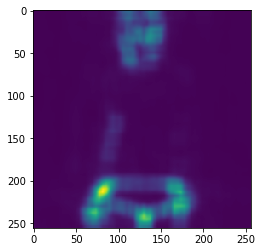

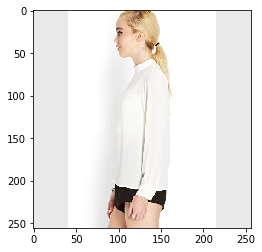

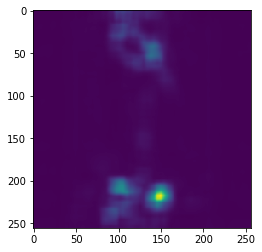

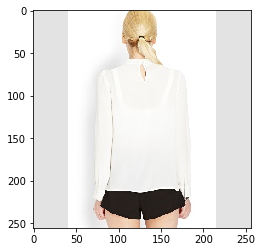

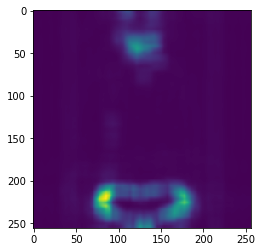

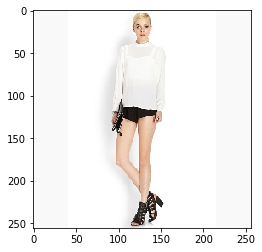

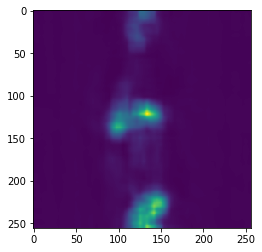

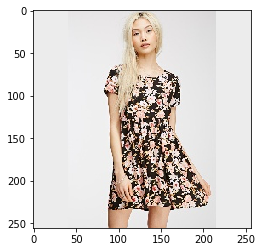

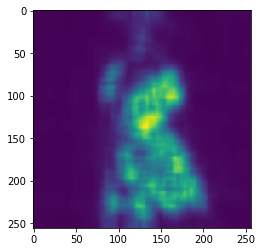

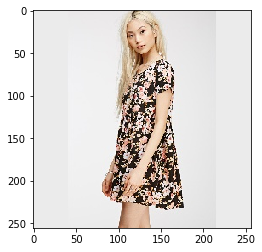

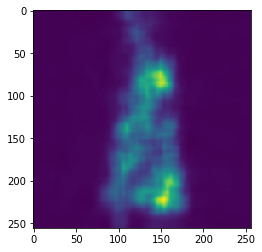

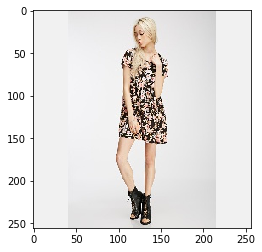

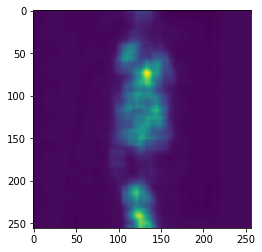

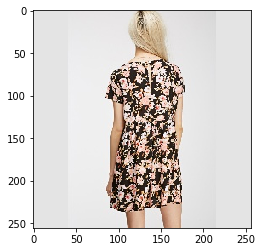

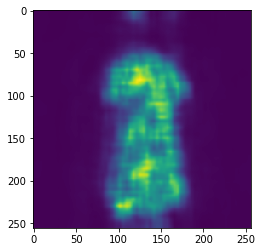

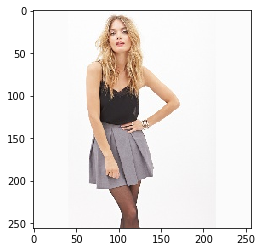

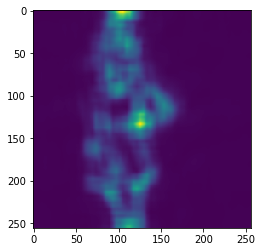

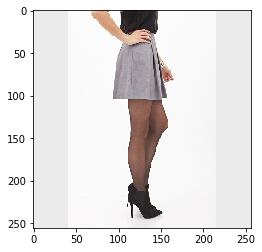

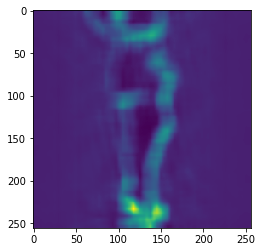

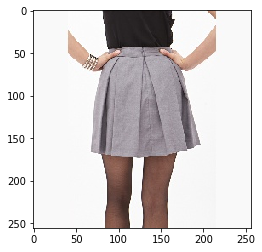

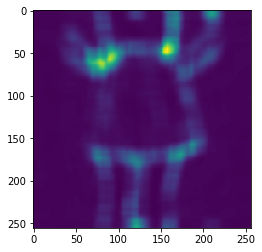

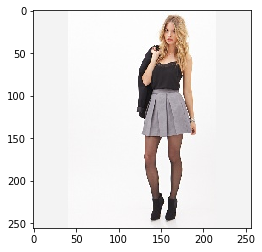

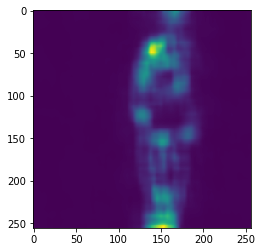

In [10]:
for index, row in df_bbox.iterrows():
    test_image = cv2.imread(os.path.join(DATA_DIR, row['image_name']))
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image)
    plt.show()
    
    # initialize OpenCV's static saliency spectral residual detector and
    # compute the saliency map
    saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
    (success, saliencyMap) = saliency.computeSaliency(test_image)
    saliencyMap = (saliencyMap * 255).astype("uint8")
    # cv2.imshow("Image", image)
    # cv2.imshow("Output", saliencyMap)
    # cv2.waitKey(0)
    
    plt.imshow(saliencyMap)
    plt.show()
    
    if index > 10:
        break

### Saliency detection with StaticSaliencyFineGrained (Just for trying out new things)


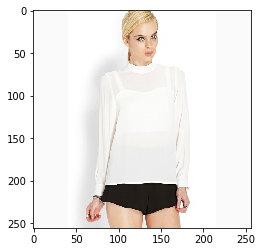

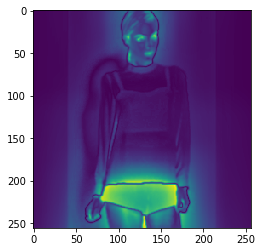

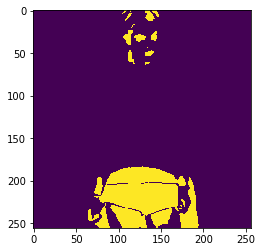

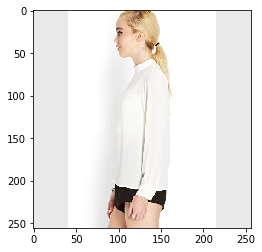

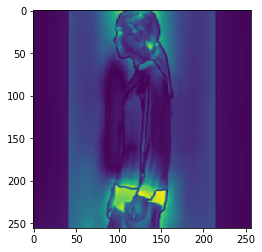

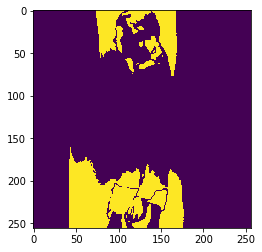

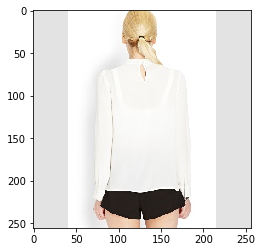

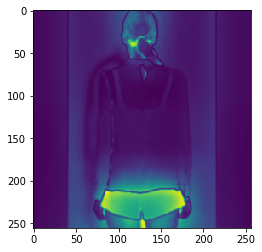

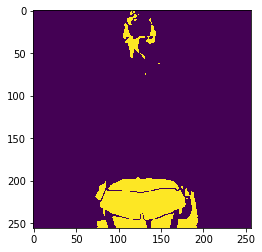

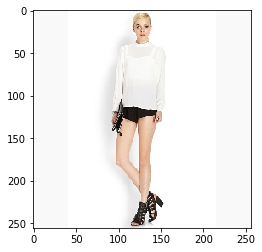

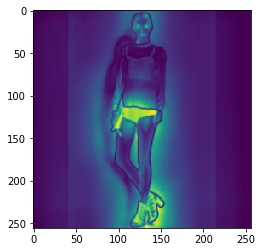

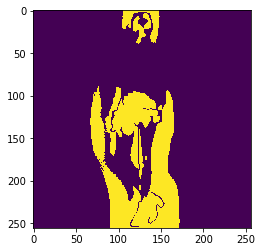

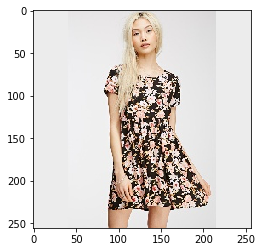

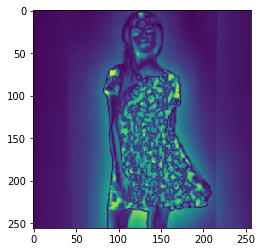

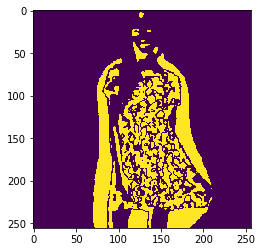

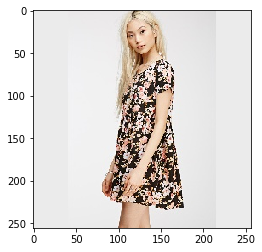

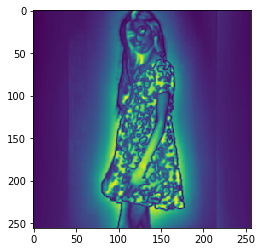

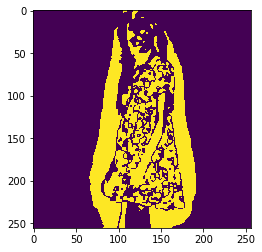

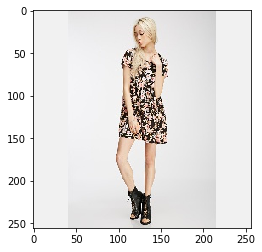

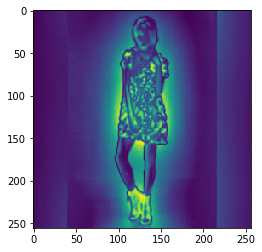

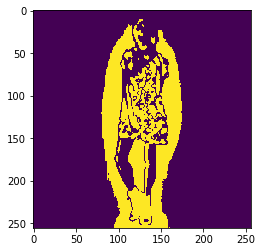

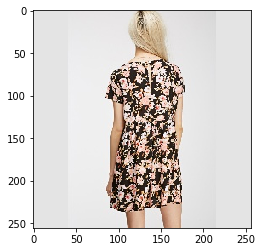

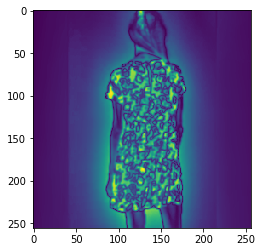

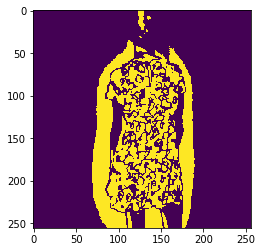

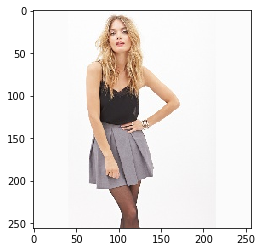

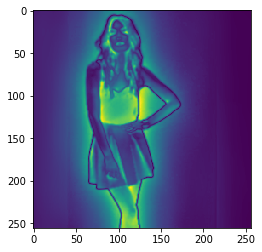

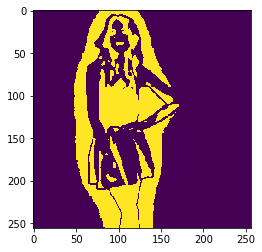

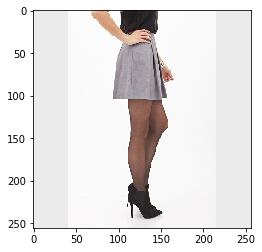

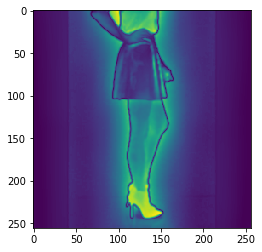

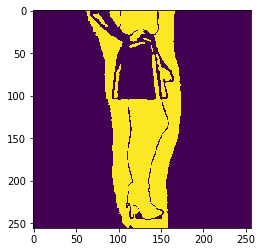

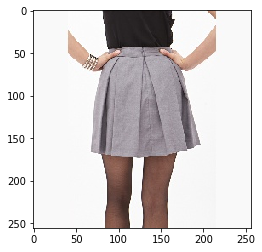

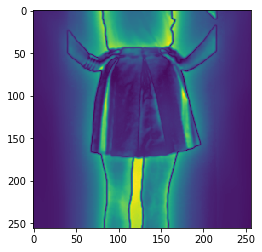

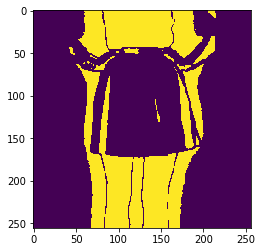

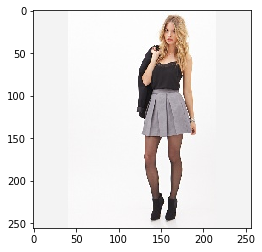

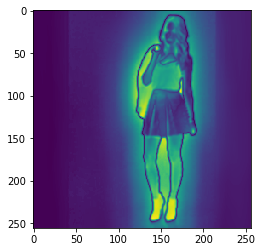

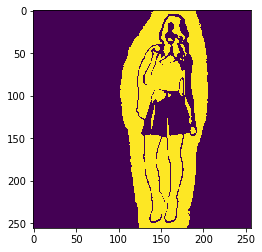

In [11]:
for index, row in df_bbox.iterrows():
    test_image = cv2.imread(os.path.join(DATA_DIR, row['image_name']))
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image)
    plt.show()
    
    # initialize OpenCV's static fine grained saliency detector and
    # compute the saliency map
    saliency = cv2.saliency.StaticSaliencyFineGrained_create()
    (success, saliencyMap) = saliency.computeSaliency(test_image)

    # if we would like a *binary* map that we could process for contours,
    # compute convex hull's, extract bounding boxes, etc., we can
    # additionally threshold the saliency map
    threshMap = cv2.threshold(saliencyMap, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    plt.imshow(saliencyMap)
    plt.show()
    plt.imshow(threshMap)
    plt.show()
    
    if index > 10:
        break


In [ ]:
import tensorflow as tf